In [1]:
import numpy as np
import pandas as pd

In [2]:
# Input the data
data = pd.read_csv('Shamoun-Baranes et al. (2016).csv');

b=data.shape;   #shape
# print(b)

In [3]:
# filter out one animols
animal_ID_317 = data[data['BirdID']==317]
# animal_ID_317

In [4]:
import time
import datetime
# timestamp
animal_ID_317.DateTime = pd.to_datetime(animal_ID_317.DateTime)
animal_ID_317.head()

C:\Users\Studying\AppData\Local\Temp\ipykernel_3844\3625234355.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animal_ID_317.DateTime = pd.to_datetime(animal_ID_317.DateTime)


,BirdID,BirdYear,Destination,DateTime,Longitude,Latitude,CumulativeDistance,ColonyDistance
19918,317,317 (2010),IberianPeninsula,2010-06-01 00:48:00,4.132943,52.899424,0.991786,22.835252
19919,317,317 (2010),IberianPeninsula,2010-06-01 01:11:00,4.127699,52.893184,1.897008,23.486885
19920,317,317 (2010),IberianPeninsula,2010-06-01 01:35:00,4.122706,52.886938,2.784944,24.132009
19921,317,317 (2010),IberianPeninsula,2010-06-01 01:58:00,4.115767,52.880747,3.818170,24.891514
19922,317,317 (2010),IberianPeninsula,2010-06-01 02:21:00,4.101258,52.874910,5.556956,26.061659


In [5]:
# set index (datetime)
animal_ID_317 = animal_ID_317.set_index('DateTime')
animal_ID_317.head()

# sort the index
animal_ID_317.sort_index(ascending = True).head()

,BirdID,BirdYear,Destination,Longitude,Latitude,CumulativeDistance,ColonyDistance
DateTime,,,,,,,
2010-06-01 00:48:00,317,317 (2010),IberianPeninsula,4.132943,52.899424,0.991786,22.835252
2010-06-01 01:11:00,317,317 (2010),IberianPeninsula,4.127699,52.893184,1.897008,23.486885
2010-06-01 01:35:00,317,317 (2010),IberianPeninsula,4.122706,52.886938,2.784944,24.132009
2010-06-01 01:58:00,317,317 (2010),IberianPeninsula,4.115767,52.880747,3.818170,24.891514
2010-06-01 02:21:00,317,317 (2010),IberianPeninsula,4.101258,52.874910,5.556956,26.061659


In [6]:
# the location of animal
animal_ID_317_pre_data = animal_ID_317[animal_ID_317.columns[3:5]]
# animal_ID_317_pre_data()

a = animal_ID_317_pre_data.resample('D').mean()
animal_ID_317_data = a.resample('D').interpolate('linear')

animal_ID_317_data

,Longitude,Latitude
DateTime,,
2010-06-01,4.583350,52.966381
2010-06-02,4.717499,53.010517
2010-06-03,4.697161,53.010346
2010-06-04,4.532929,52.930248
2010-06-05,4.697379,53.008980
...,...,...
2015-05-27,4.830571,52.864545
2015-05-28,4.777756,52.935721
2015-05-29,4.873837,52.813498


In [7]:
# Predict the future 30 days
pre_days = 30
animal_ID_317_data['label_1'] = animal_ID_317_data['Longitude'].shift(-pre_days)
animal_ID_317_data['label_2'] = animal_ID_317_data['Latitude'].shift(-pre_days)
animal_ID_317_data

,Longitude,Latitude,label_1,label_2
DateTime,,,,
2010-06-01,4.583350,52.966381,4.563042,52.777059
2010-06-02,4.717499,53.010517,4.636822,52.932631
2010-06-03,4.697161,53.010346,4.679205,52.916560
2010-06-04,4.532929,52.930248,4.641102,52.875322
2010-06-05,4.697379,53.008980,4.695463,52.989734
...,...,...,...,...
2015-05-27,4.830571,52.864545,NaN,NaN
2015-05-28,4.777756,52.935721,NaN,NaN
2015-05-29,4.873837,52.813498,NaN,NaN


In [8]:
# Standardlise
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
data_scalar = scalar.fit_transform(animal_ID_317_data.iloc[:,:-2])
print(data_scalar)

[[0.9640271  0.94043501]
 [0.99642395 0.94691608]
 [0.99151218 0.94689092]
 ...
 [1.03417918 0.91798531]
 [1.00588337 0.93996288]
 [1.03458994 0.91791135]]


In [9]:
# memory days
memory_days = 5

In [10]:
from collections import deque
deq = deque(maxlen=memory_days)

# processing queue--input features
queue_input = []
for i in data_scalar:
    deq.append(list(i))
    if len(deq)==memory_days:
        queue_input.append(list(deq))
print(len(queue_input))      

# processing the final misssing data ( cut the pre_days data )
queue_last = queue_input[-pre_days:]
queue_input = queue_input[:-pre_days]
print(len(queue_input))

queue_output = animal_ID_317_data.iloc[:,2:4].values[memory_days-1:-pre_days]
print(queue_output)

1822
1792
[[ 4.6954634  52.98973433]
 [ 4.57972301 53.03233531]
 [ 4.60481878 52.92820891]
 ...
 [ 4.87383688 52.81349794]
 [ 4.75666912 52.96316571]
 [ 4.87553777 52.81299425]]


In [11]:
# transfer list to array
queue_input = np.array(queue_input)
print(queue_input.shape)

queue_output = np.array(queue_output)
print(queue_output.shape)

(1792, 5, 2)
(1792, 2)


In [12]:
# split into traning and test datasets
from sklearn.model_selection import train_test_split
queue_input_train,queue_input_test,queue_output_train,queue_output_test = train_test_split(queue_input,queue_output,test_size=0.1)

In [13]:
#  Build LSTM Neural Networks

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout

# Build model
model = Sequential()
model.add(LSTM(10,input_shape = queue_input.shape[1:],activation='relu',return_sequences=True)) # first layer
model.add(Dropout(0.1))   # prevent overfitting

model.add(LSTM(10,activation='relu',return_sequences=True)) # second layer
model.add(Dropout(0.1))   # prevent overfitting

model.add(LSTM(10,activation='relu')) # third layer
model.add(Dropout(0.1))   # prevent overfitting

model.add(Dense(10,activation='relu')) # # fully connected layer
model.add(Dropout(0.1))   # prevent overfitting

model.add(Dense(2)) #  output layer

# compile model
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mape'])

In [15]:
# model traning
model.fit(queue_input_train,queue_output_train,batch_size=32,epochs=50,validation_data=(queue_input_test,queue_output_test))

Epoch 1/50
51/51 [==============================] - 3s 9ms/step - loss: 1098.9049 - mape: 99.5299 - val_loss: 1081.5311 - val_mape: 98.3100
Epoch 2/50
51/51 [==============================] - 0s 4ms/step - loss: 654.5641 - mape: 89.1682 - val_loss: 229.1576 - val_mape: 57.6596
Epoch 3/50
51/51 [==============================] - 0s 4ms/step - loss: 199.6979 - mape: 76.4682 - val_loss: 108.7796 - val_mape: 51.5157
Epoch 4/50
51/51 [==============================] - 0s 4ms/step - loss: 125.4246 - mape: 74.6098 - val_loss: 61.6145 - val_mape: 46.7921
Epoch 5/50
51/51 [==============================] - 0s 4ms/step - loss: 96.9436 - mape: 67.9260 - val_loss: 39.6817 - val_mape: 47.0098
Epoch 6/50
51/51 [==============================] - 0s 4ms/step - loss: 80.8000 - mape: 76.0335 - val_loss: 29.9091 - val_mape: 46.4442
Epoch 7/50
51/51 [==============================] - 0s 4ms/step - loss: 71.7847 - mape: 66.3416 - val_loss: 28.8337 - val_mape: 48.6844
Epoch 8/50
51/51 [=====================

In [16]:
pre = model.predict(queue_input_test)
print(pre)

6/6 [==============================] - 0s 1ms/step
[[-1.6613381  35.007454  ]
 [-1.1072909  40.15544   ]
 [ 2.4695098  48.876064  ]
 [-1.1079609  40.39711   ]
 [ 0.52420586 42.41086   ]
 [ 0.4983576  42.373466  ]
 [ 0.4776774  42.270744  ]
 [ 2.4080563  48.610504  ]
 [-1.1014476  40.248363  ]
 [ 2.4109383  48.600773  ]
 [ 0.74170464 43.245922  ]
 [ 2.2881622  48.082302  ]
 [-1.1072255  40.193947  ]
 [ 0.20060354 41.49264   ]
 [ 0.4846359  42.325073  ]
 [ 2.319612   48.230476  ]
 [ 2.456561   48.820812  ]
 [ 2.3479614  48.37328   ]
 [ 1.3053658  45.82741   ]
 [-1.0965925  39.72851   ]
 [ 2.7697592  50.105003  ]
 [-1.1118411  40.15285   ]
 [ 2.4560752  48.817738  ]
 [ 0.49241322 42.317467  ]
 [ 1.0434954  44.575573  ]
 [-1.6572444  35.06636   ]
 [ 0.4927717  42.365627  ]
 [-1.6567206  35.08681   ]
 [ 1.1114945  44.918907  ]
 [ 0.4923095  42.358627  ]
 [ 2.3697376  48.419918  ]
 [-1.7482641  34.707394  ]
 [-0.42420638 40.681168  ]
 [-0.12916654 41.03444   ]
 [ 2.4325259  48.72281   ]
 [-1

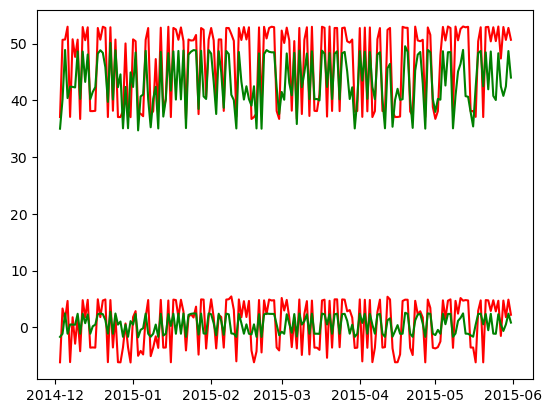

In [17]:
import matplotlib.pyplot as plt
data_time = animal_ID_317_data.index[-len(queue_output_test):]
plt.plot(data_time,queue_output_test,color='red')
plt.plot(data_time,pre,color='green')
plt.show()

In [18]:
print(len(queue_output_test))
print(len(queue_input_test))
print(len(pre))
print(queue_output_test.shape)
print(queue_input_test.shape)

180
180
180
(180, 2)
(180, 5, 2)


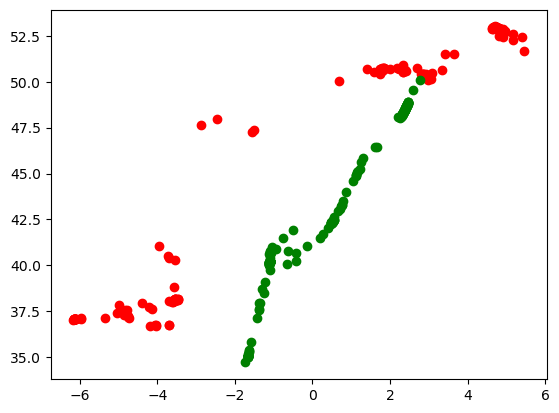

In [19]:
plt.scatter(queue_output_test[:,0],queue_output_test[:,1],color='red')
plt.scatter(pre[:,0],pre[:,1],color='green')
# plt.plot(data_time,pre,color='green')
plt.show()